In [0]:
#Name: Yehuda Perry
#Course ID and Name: IST652 - Scripting for Data Analysis
#Date: 04/14/2020
#Purpose: Homework 1 - Structured Data

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import plotly.express as px
import seaborn as sns
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from matplotlib import pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [0]:
#Data Frame 'donors'
donors = pd.read_csv('/content/donors_data.csv')

In [3]:
#Load first 5 lines in the dataset(DF)
donors.head()

,Row Id,Row Id.,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner dummy,NUMCHLD,INCOME,gender dummy,WEALTH,HV,Icmed,Icavg,IC15,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT,TARGET_B,TARGET_D
0,1,17,0,1,0,0,1,1,5,1,9,1399,637,703,1,74,102.0,6.0,5.0,29,3,4.857143,1,5.0
1,2,25,1,0,0,0,1,1,1,0,7,698,422,463,4,46,94.0,12.0,12.0,34,6,9.400000,1,10.0
2,3,29,0,0,0,1,0,2,5,1,8,828,358,376,13,32,30.0,10.0,5.0,29,7,4.285714,1,5.0
3,4,38,0,0,0,1,1,1,3,0,4,1471,484,546,4,94,177.0,10.0,8.0,30,3,7.080000,0,0.0
4,5,40,0,1,0,0,1,1,4,0,8,547,386,432,7,20,23.0,11.0,11.0,30,6,7.666667,0,0.0


In [4]:
donors.describe()

,Row Id,Row Id.,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner dummy,NUMCHLD,INCOME,gender dummy,WEALTH,HV,Icmed,Icavg,IC15,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT,TARGET_B,TARGET_D
count,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.00000,3120.000000
mean,1560.500000,11615.770833,0.214423,0.185256,0.214423,0.384615,0.770192,1.069231,3.893910,0.609295,6.402244,1141.361859,388.217308,432.088141,14.702885,49.089423,110.399875,16.651397,13.522917,31.136859,6.861859,10.690713,0.50000,6.499612
std,900.810746,6698.678131,0.410487,0.388568,0.410487,0.486582,0.420777,0.347688,1.636186,0.487987,2.539978,946.642162,172.815950,168.195104,12.079882,22.717130,147.299933,22.223521,10.581439,4.132952,5.561209,7.443980,0.50008,10.597849
min,1.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,15.000000,5.000000,0.000000,17.000000,0.000000,2.138889,0.00000,0.000000
25%,780.750000,5820.750000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,0.000000,5.000000,556.000000,278.000000,318.000000,5.000000,29.000000,45.000000,10.000000,7.000000,29.000000,3.000000,6.356092,0.00000,0.000000
50%,1560.500000,11735.500000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,1.000000,8.000000,822.000000,356.000000,396.000000,12.000000,48.000000,81.000000,15.000000,10.000000,31.000000,5.000000,9.000000,0.50000,0.500000
75%,2340.250000,17435.750000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,8.000000,1338.750000,465.000000,516.000000,21.000000,65.000000,134.625000,20.000000,16.000000,34.000000,9.000000,12.811652,1.00000,10.000000
max,3120.000000,23293.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,7.000000,1.000000,9.000000,5945.000000,1500.000000,1331.000000,90.000000,157.000000,5674.900000,1000.000000,219.000000,37.000000,77.000000,122.166667,1.00000,200.000000


In [5]:
donors.shape

(3120, 24)

In [6]:
donors.size

74880

In [7]:
donors.info

<bound method DataFrame.info of       Row Id  Row Id.  zipconvert_2  ...    AVGGIFT  TARGET_B  TARGET_D
0          1       17             0  ...   4.857143         1       5.0
1          2       25             1  ...   9.400000         1      10.0
2          3       29             0  ...   4.285714         1       5.0
3          4       38             0  ...   7.080000         0       0.0
4          5       40             0  ...   7.666667         0       0.0
...      ...      ...           ...  ...        ...       ...       ...
3115    3116    23256             0  ...   7.500000         0       0.0
3116    3117    23258             0  ...  26.500000         1      40.0
3117    3118    23261             0  ...  11.157895         0       0.0
3118    3119    23265             0  ...  20.000000         0       0.0
3119    3120    23293             0  ...   9.250000         0       0.0

[3120 rows x 24 columns]>

In [0]:
#Dropping columns that wont be used
donors = donors.drop(columns=['Row Id','Row Id.','zipconvert_2','zipconvert_3','zipconvert_4','zipconvert_5'], axis = 1)

In [0]:
#Renaming Columns 
donors_cleansed_df = pd.concat([donors['homeowner dummy'],donors['NUMCHLD'],donors['INCOME'],donors['gender dummy'],donors['WEALTH'],donors['HV'],
                  donors['Icmed'],donors['Icavg'],donors['IC15'],donors['NUMPROM'],donors['RAMNTALL'],donors['MAXRAMNT'],donors['LASTGIFT'], 
                  donors['totalmonths'],donors['TIMELAG'],donors['AVGGIFT'],donors['TARGET_D']],axis=1,keys=['homeowner','numchildren','income','gender',
                       'wealth','homevalue','income_med','income_avg','lowincome_perc','numpromos','donations_total','donations_max', 
                       'last_gift','donations_months','donations_time_lag','avg_gift','donation_amt'])

In [10]:
#Cleansed DataFrame with describe function
donors_cleansed_df.describe()

,homeowner,numchildren,income,gender,wealth,homevalue,income_med,income_avg,lowincome_perc,numpromos,donations_total,donations_max,last_gift,donations_months,donations_time_lag,avg_gift,donation_amt
count,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000
mean,0.770192,1.069231,3.893910,0.609295,6.402244,1141.361859,388.217308,432.088141,14.702885,49.089423,110.399875,16.651397,13.522917,31.136859,6.861859,10.690713,6.499612
std,0.420777,0.347688,1.636186,0.487987,2.539978,946.642162,172.815950,168.195104,12.079882,22.717130,147.299933,22.223521,10.581439,4.132952,5.561209,7.443980,10.597849
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,15.000000,5.000000,0.000000,17.000000,0.000000,2.138889,0.000000
25%,1.000000,1.000000,3.000000,0.000000,5.000000,556.000000,278.000000,318.000000,5.000000,29.000000,45.000000,10.000000,7.000000,29.000000,3.000000,6.356092,0.000000
50%,1.000000,1.000000,4.000000,1.000000,8.000000,822.000000,356.000000,396.000000,12.000000,48.000000,81.000000,15.000000,10.000000,31.000000,5.000000,9.000000,0.500000
75%,1.000000,1.000000,5.000000,1.000000,8.000000,1338.750000,465.000000,516.000000,21.000000,65.000000,134.625000,20.000000,16.000000,34.000000,9.000000,12.811652,10.000000
max,1.000000,5.000000,7.000000,1.000000,9.000000,5945.000000,1500.000000,1331.000000,90.000000,157.000000,5674.900000,1000.000000,219.000000,37.000000,77.000000,122.166667,200.000000


In [0]:
# Due to the outliers, I tuned the number to 2000 (better clean that way) 
new = donors_cleansed_df[donors_cleansed_df.donations_total <= 2000]

In [0]:
#new DF equal to the new tunning 
donors_cleansed_df = new

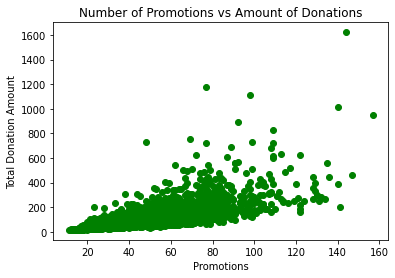

In [13]:
#First Question: Does the number of promotions really impact the sum amount of donations?
plt.plot(donors_cleansed_df.numpromos, donors_cleansed_df.donations_total, 'o', color='green')
plt.title('Number of Promotions vs Amount of Donations')
plt.xlabel('Promotions')
plt.ylabel('Total Donation Amount')
plt.show()

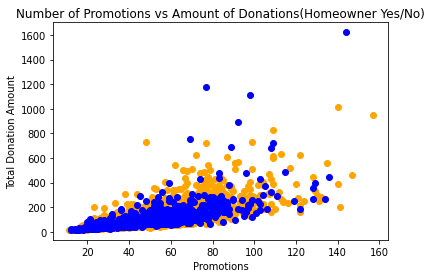

In [15]:
#In addition to question 1, I would suggest to compare the total donation amount to the number of promotions  
homeowner_yes = donors_cleansed_df[donors_cleansed_df.homeowner == 1]
homeowner_no = donors_cleansed_df[donors_cleansed_df.homeowner == 0]
plt.plot(homeowner_yes.numpromos, homeowner_yes.donations_total, 'o', color='orange')
plt.plot(homeowner_no.numpromos, homeowner_no.donations_total, 'o', color='blue')
plt.title('Number of Promotions vs Amount of Donations(Homeowner Yes/No)')
plt.xlabel('Promotions')
plt.ylabel('Total Donation Amount')
plt.show()

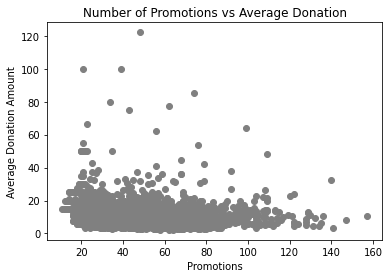

In [31]:
#Second Question: Does the number of promotions influence the average amount of donations?
plt.plot(donors_cleansed_df.numpromos, donors_cleansed_df.avg_gift, 'o', color='gray')
plt.title('Number of Promotions vs Average Donation')
plt.xlabel('Promotions')
plt.ylabel('Average Donation Amount')
plt.show()

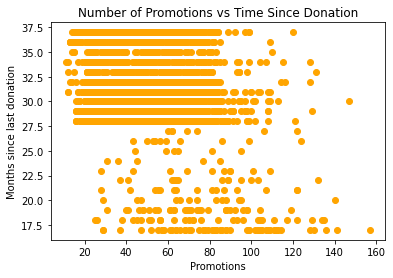

In [32]:
#Third Question: Does number of promotions infulence the time since the last donation?
plt.plot(donors_cleansed_df.numpromos, donors_cleansed_df.donations_months, 'o', color='orange')
plt.title('Number of Promotions vs Time Since Donation')
plt.xlabel('Promotions')
plt.ylabel('Months since last donation')
plt.show()

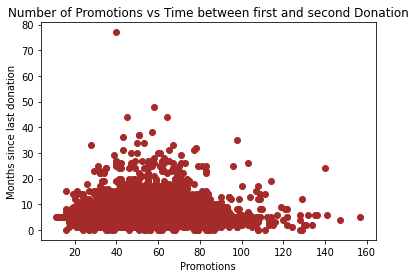

In [35]:
#Fourth Question: Does number of promotions influence the time between first and second donation?
plt.plot(donors_cleansed_df.numpromos, donors_cleansed_df.donations_time_lag, 'o', color='brown')
plt.title('Number of Promotions vs Time between first and second Donation')
plt.xlabel('Promotions')
plt.ylabel('Months since last donation')
plt.show()

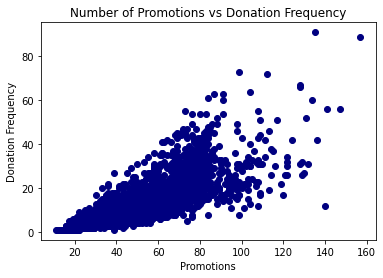

In [34]:
#Fifth Question: Does Donation Frequency infulence on the number of promotions
donation_freq = donors_cleansed_df.donations_total/donors_cleansed_df.avg_gift
plt.plot(donors_cleansed_df.numpromos, donation_freq, 'o', color='navy')
plt.title('Number of Promotions vs Donation Frequency')
plt.xlabel('Promotions')
plt.ylabel('Donation Frequency')
plt.show()

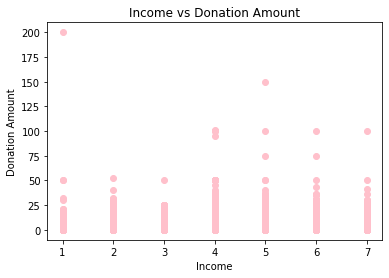

In [18]:
#Sixth Question: Is there any relationship/correlation between income and donation frequency?
plt.plot(donors_cleansed_df.income, donors_cleansed_df.donation_amt, 'o', color='pink')
plt.title('Income vs Donation Amount')
plt.xlabel('Income')
plt.ylabel('Donation Amount')
plt.show()